In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline
from pyannote.audio import Pipeline
from dotenv import load_dotenv
import os

load_dotenv()

pipe_whisper = pipeline(
    task="automatic-speech-recognition",
    model="openai/whisper-large-v3-turbo",
    device=0
)

# instantiate the pipeline
pipe_diarization = Pipeline.from_pretrained(
  "pyannote/speaker-diarization-3.1",
  use_auth_token=os.getenv("HF_TOKEN"))

# run the pipeline on an audio file
diarization = pipe_diarization("batalla01.mp3")

/Users/miguel/Documents/whispers/audio-transcription/.venv_audio/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
/Users/miguel/Documents/whispers/audio-transcription/.venv_audio/lib/python3.9/site-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  std = sequences.std(dim=-1, correction=1)
/Users/miguel/Documents/whispers/audio-transcription/.venv_audio/lib/python3.9/site-packages/torchaudio/_backend/soundfile_backend.py:71: UserWarning: The MPEG_LAYER_III subtype is unknown to TorchAudio. As a result, the bits_per_sample att

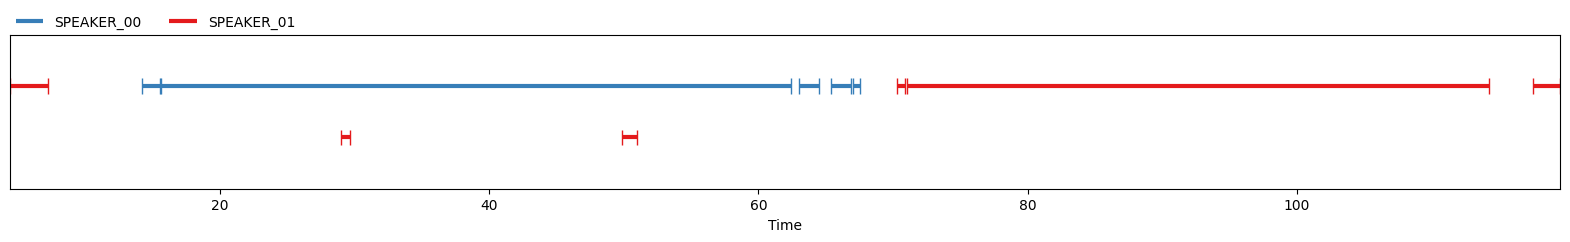

In [3]:
diarization

In [4]:
# dump the diarization output to disk using RTTM format
with open("audio.rttm", "w") as rttm:
    diarization.write_rttm(rttm)




In [9]:
transcription_batalla=pipe("batalla01.mp3", return_timestamps=True)

/Users/miguel/Documents/whispers/audio-transcription/.venv/lib/python3.10/site-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


In [10]:
transcription_batalla

{'text': " Encyclopedia versus piezas Tengo aquí en mi mente, el ojo, el dejo potente, siempre me gusta la guerra. Este te entierra y te encierra, piezas, rompo tu cabeza, tú siempre serás mi perra. Tengo rimas que se salen las vocales pa' que salen, están consolidadas. El que sobresale cuando está en su sala, conmigo siempre emprendió la retirada. Por eso tengo rimas que te hacen daño, no te engaño, aquí está, no hay fallo. Me gusta esta referencia, es extraño Yo hice que te retiraran por lo menos 20 años Te largaste por carajo Aprende a contar, baby 3, 2, 1, y a mi dieta Voy a firmar tu esquela, a mí me la pela Hago beatbox como Kila Kela Lo que me dices de verdad me la pela ¿Qué coño hago aquí si yo soy de Murcia? Pero es que tú eres de Venezuela ¿Qué me quieres contar? La cosa está seria En tu cara te pongo una media pieza a esa serie Te voy a hacer ver las estrellas Coño, qué curioso repulsa, sabía que venía a Cocurella Me tomen la polla y después tiras de ella Te digo de nuevo qu